In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv("CarPrice_Assignment (1).csv")

# Drop unnecessary columns
df = data.drop(['car_ID', 'CarName'], axis=1)

# Handle missing values if any
df = data.dropna()

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['fueltype'] = label_encoder.fit_transform(df['fueltype'])
df['aspiration'] = label_encoder.fit_transform(df['aspiration'])
df['doornumber'] = label_encoder.fit_transform(df['doornumber'])
df['carbody'] = label_encoder.fit_transform(df['carbody'])
df['drivewheel'] = label_encoder.fit_transform(df['drivewheel'])
df['enginelocation'] = label_encoder.fit_transform(df['enginelocation'])
df['enginetype'] = label_encoder.fit_transform(df['enginetype'])
df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber'])
df['fuelsystem'] = label_encoder.fit_transform(df['fuelsystem'])

In [6]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,1,0,1,3,1,0,99.8,...,136,5,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,1,0,0,3,1,0,105.8,...,136,5,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,1,0,0,4,1,0,105.8,...,136,5,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,1,1,0,3,1,0,105.8,...,131,5,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),1,1,1,2,0,0,99.5,...,131,5,3.13,3.40,7.0,160,5500,16,22,17859.167


C:\Users\Dell\anacondanew3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anacondanew3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anacondanew3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anacondanew3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

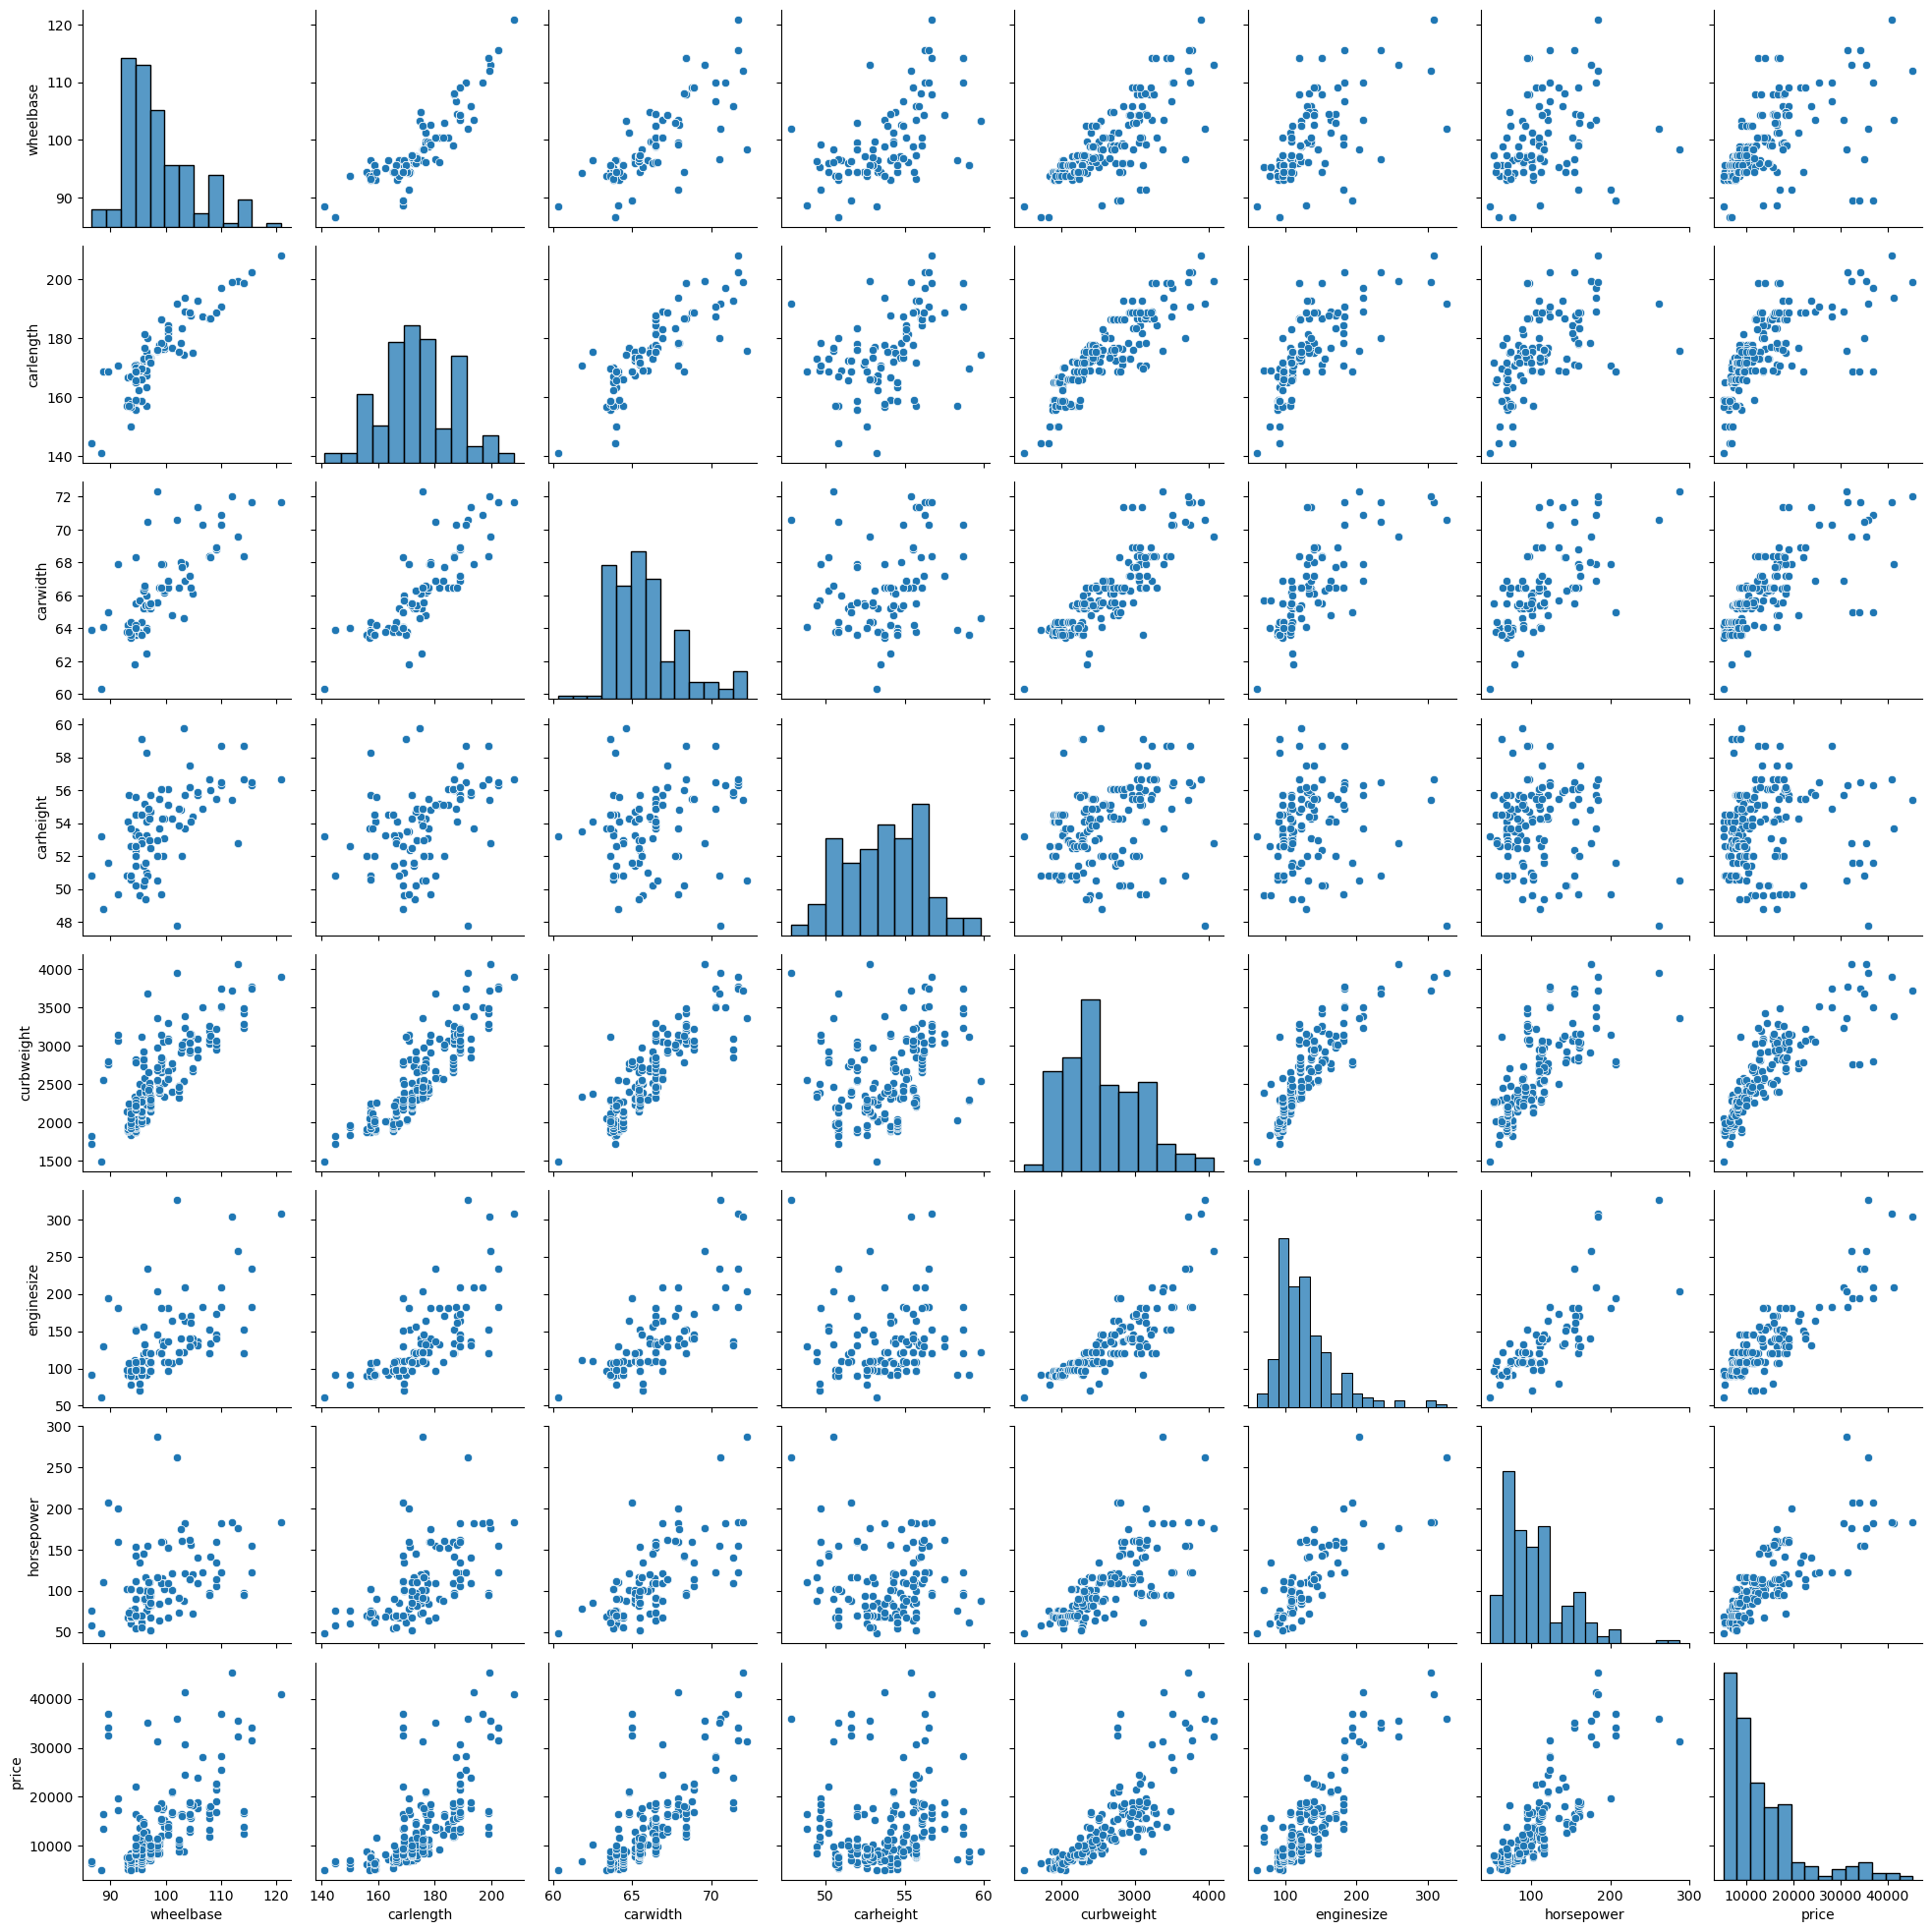

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pair plot for numerical features
sns.pairplot(data[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'price']])
plt.savefig('D:/SET 3/Output/PairPlot.png')
plt.show()
plt.show()

In [6]:
# Correlation heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig('D:/SET 3/Output/CorrelationHeatmap.png')
plt.show()

ValueError: could not convert string to float: 'alfa-romero giulia'

<Figure size 1600x800 with 0 Axes>

In [ ]:
# Box plot for car body vs. price
plt.figure(figsize=(12, 8))
sns.boxplot(x='carbody', y='price', data=df)
plt.title('Box Plot: Car Body vs. Price')
plt.savefig('F:/Docs/Data Science/Projects/Car-Price-Prediction-using-DL/Images/box_CarBody_vs_Price.png')
plt.show()

In [ ]:
import os
import plotly.graph_objects as go
# 3D Scatter plot for curbweight, horsepower, and price (Interactive)
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=data['curbweight'],
    y=data['horsepower'],
    z=data['price'],
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.5),
    text=df['CarName'],
    hoverinfo='text'
))

fig.update_layout(scene=dict(
                    xaxis_title='Curb Weight',
                    yaxis_title='Horsepower',
                    zaxis_title='Price'),
                    title='Interactive 3D Scatter Plot: Curb Weight, Horsepower, and Price',
                    margin=dict(l=0, r=0, b=0, t=40))

fig.show()

In [7]:
import numpy as np

# Split the data into features and target
X = df.drop('price', axis=1)
y = df['price']

# Exclude non-numeric columns from X
X_numeric = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Store error values for each model
error_values = []

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Build the simple neural network model
model_simple = Sequential()
model_simple.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_simple.add(Dense(32, activation='relu'))
model_simple.add(Dense(1, activation='linear'))
model_simple.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history_simple = model_simple.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Evaluate the model
y_pred_simple = model_simple.predict(X_test_scaled)
mse_simple = mean_squared_error(y_test, y_pred_simple)/(100000)
r2_simple = r2_score(y_test, y_pred_simple)

error_values.append(("Simple Neural Network", mse_simple, r2_simple))

print(f"Simple Neural Network MSE: {mse_simple}, R-squared: {r2_simple}")

C:\Users\Dell\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Simple Neural Network MSE: 224.8224340528063, R-squared: 0.7152128412669456


In [15]:
# Build the more complex neural network model
model_complex = Sequential()
model_complex.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_complex.add(Dense(64, activation='relu'))
model_complex.add(Dense(32, activation='relu'))
model_complex.add(Dense(1, activation='linear'))
model_complex.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history_complex = model_complex.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Evaluate the model
y_pred_complex = model_complex.predict(X_test_scaled)
mse_complex = mean_squared_error(y_test, y_pred_complex)/(100000)
r2_complex = r2_score(y_test, y_pred_complex)

error_values.append(("Complex Neural Network", mse_complex, r2_complex))

print(f"Complex Neural Network MSE: {mse_complex}, R-squared: {r2_complex}")

C:\Users\Dell\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Complex Neural Network MSE: 108.65544231961707, R-squared: 0.8623639369911857


In [16]:
# Build the MLP model
model_mlp = Sequential()
model_mlp.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_mlp.add(Dense(32, activation='relu'))
model_mlp.add(Dense(1, activation='linear'))
model_mlp.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history_mlp = model_mlp.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Evaluate the model
y_pred_mlp = model_mlp.predict(X_test_scaled)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)/(100000)
r2_mlp = r2_score(y_test, y_pred_mlp)

error_values.append(("MLP", mse_mlp, r2_mlp))

print(f"MLP MSE: {mse_mlp}, R-squared: {r2_mlp}")

C:\Users\Dell\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
MLP MSE: 267.512478327812, R-squared: 0.6611364922295911


In [17]:
# Build the simple RNN model
model_rnn = Sequential()
model_rnn.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_rnn.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_rnn.add(Dense(1, activation='linear'))
model_rnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history_rnn = model_rnn.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Evaluate the model
y_pred_rnn = model_rnn.predict(X_test_scaled)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)/(100000)
r2_rnn = r2_score(y_test, y_pred_rnn)

error_values.append(("Simple RNN", mse_rnn, r2_rnn))

print(f"Simple RNN MSE: {mse_rnn}, R-squared: {r2_rnn}")

C:\Users\Dell\anacondanew3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Simple RNN MSE: 280.3951702566027, R-squared: 0.6448177238349218


In [21]:
from tensorflow.keras.layers import LSTM

# Reshape input for LSTM
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_lstm.add(Dense(1, activation='linear'))
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history_lstm = model_lstm.fit(X_train_lstm, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Evaluate the model
y_pred_lstm = model_lstm.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)/100000
r2_lstm = r2_score(y_test, y_pred_lstm)

error_values.append(("LSTM", mse_lstm, r2_lstm))

print(f"LSTM MSE: {mse_lstm}, R-squared: {r2_lstm}")

C:\Users\Dell\anacondanew3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
LSTM MSE: 275.19865398610057, R-squared: 0.6514002568913818


In [14]:
# Save each model
for model_name, model, _, _ in [("Simple Neural Network", model_simple, X_test_scaled, y_test),
                                ("Complex Neural Network", model_complex, X_test_scaled, y_test),
                                ("LSTM", model_lstm, X_test_lstm, y_test),
                                ("Simple RNN", model_rnn, X_test_scaled, y_test),
                                ("MLP", model_mlp, X_test_scaled, y_test)]:
    model.save(f"{model_name}_model.h5")
    print(f"{model_name} model saved successfully.")

Simple Neural Network model saved successfully.


Complex Neural Network model saved successfully.
LSTM model saved successfully.


Simple RNN model saved successfully.
MLP model saved successfully.


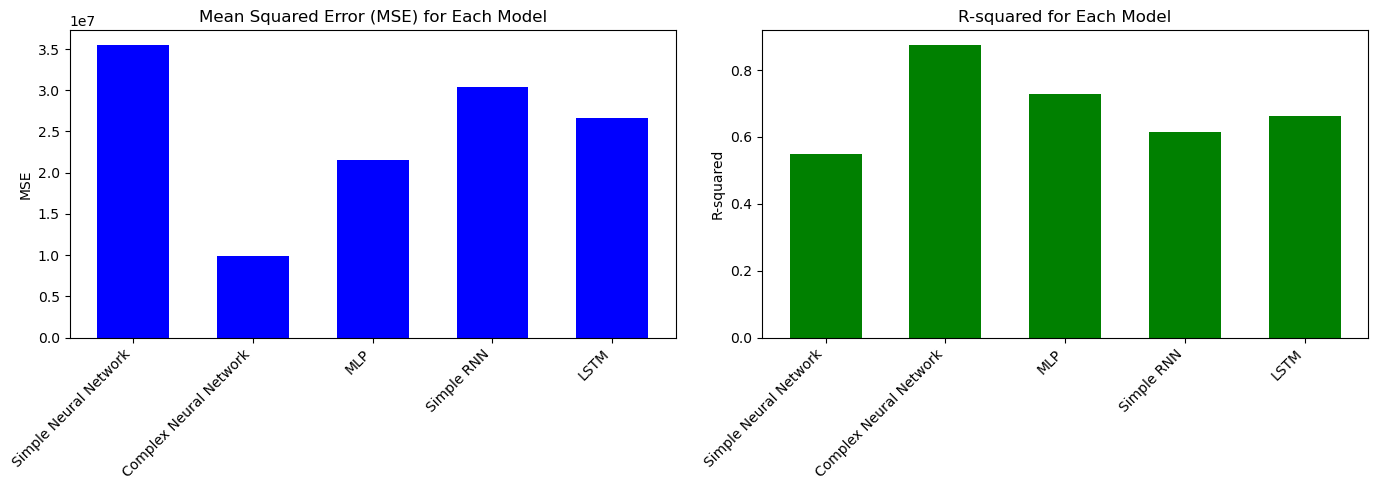

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting error values
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# MSE plot
model_names_mse = [model_name for model_name, mse, _ in error_values]
axes[0].bar(model_names_mse, [mse for _, mse, _ in error_values], color='blue', width=0.6)
axes[0].set_title('Mean Squared Error (MSE) for Each Model')
axes[0].set_ylabel('MSE')
axes[0].set_xticks(np.arange(len(model_names_mse)))  # Set tick positions
axes[0].set_xticklabels(model_names_mse, rotation=45, ha='right')  # Set tick labels

# R-squared plot
model_names_r2 = [model_name for model_name, _, r2 in error_values]
axes[1].bar(model_names_r2, [r2 for _, _, r2 in error_values], color='green', width=0.6)
axes[1].set_title('R-squared for Each Model')
axes[1].set_ylabel('R-squared')
axes[1].set_xticks(np.arange(len(model_names_r2)))  # Set tick positions
axes[1].set_xticklabels(model_names_r2, rotation=45, ha='right')  # Set tick labels

plt.tight_layout()
plt.savefig('D:/SET 3/Output/ErrorValuesBarPlot.png')
plt.show()

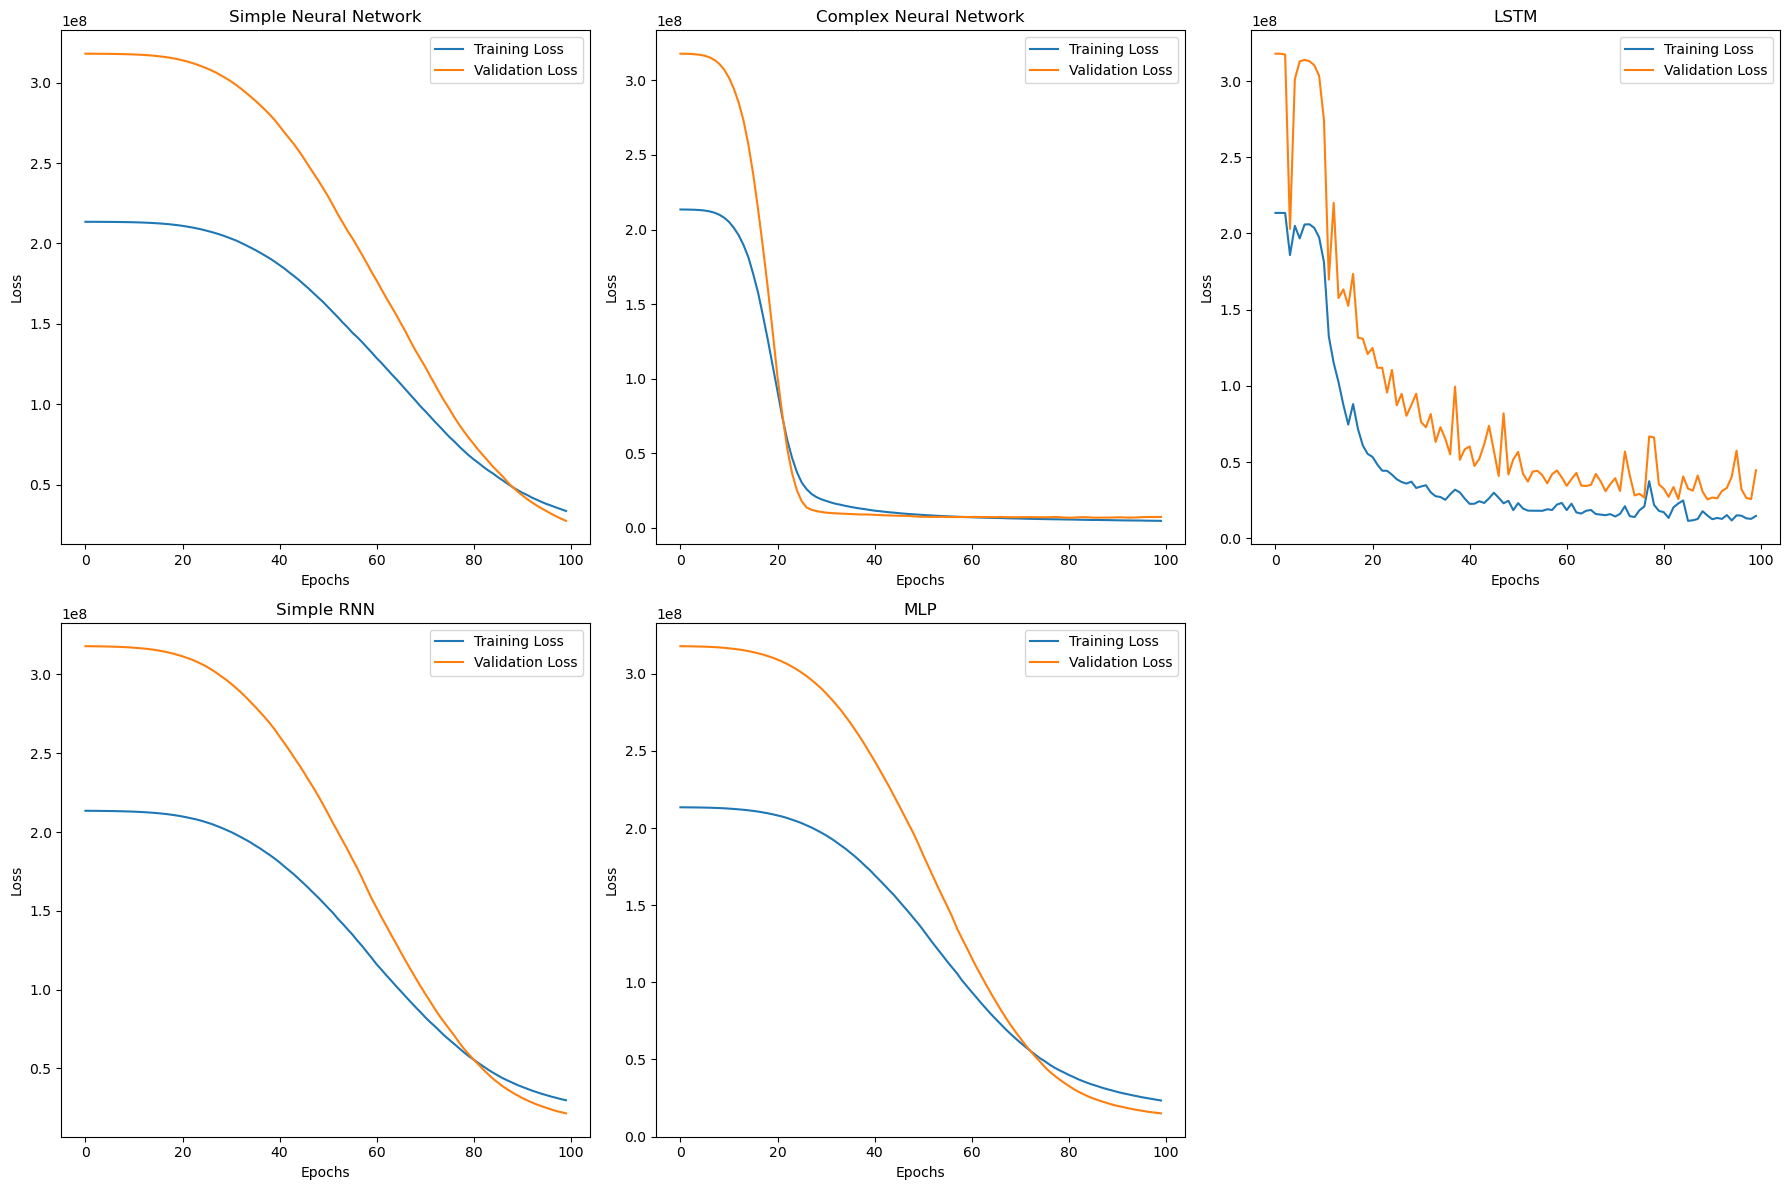

In [18]:
# Visualize training and validation loss for all models in separate subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# List of model names and their corresponding training histories
models_and_histories = [
    ("Simple Neural Network", history_simple),
    ("Complex Neural Network", history_complex),
    ("LSTM", history_lstm),
    ("Simple RNN", history_rnn),
    ("MLP", history_mlp)
]

for i, (model_name, history) in enumerate(models_and_histories):
    row = i // 3
    col = i % 3

    axes[row, col].plot(history.history['loss'], label='Training Loss')
    axes[row, col].plot(history.history['val_loss'], label='Validation Loss')
    axes[row, col].set_title(model_name)
    axes[row, col].set_xlabel('Epochs')
    axes[row, col].set_ylabel('Loss')
    axes[row, col].legend()

# Remove the empty subplot at position (1, 2)
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.savefig('D:/SET 3/Output/TrainingHistoryPlot.png')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


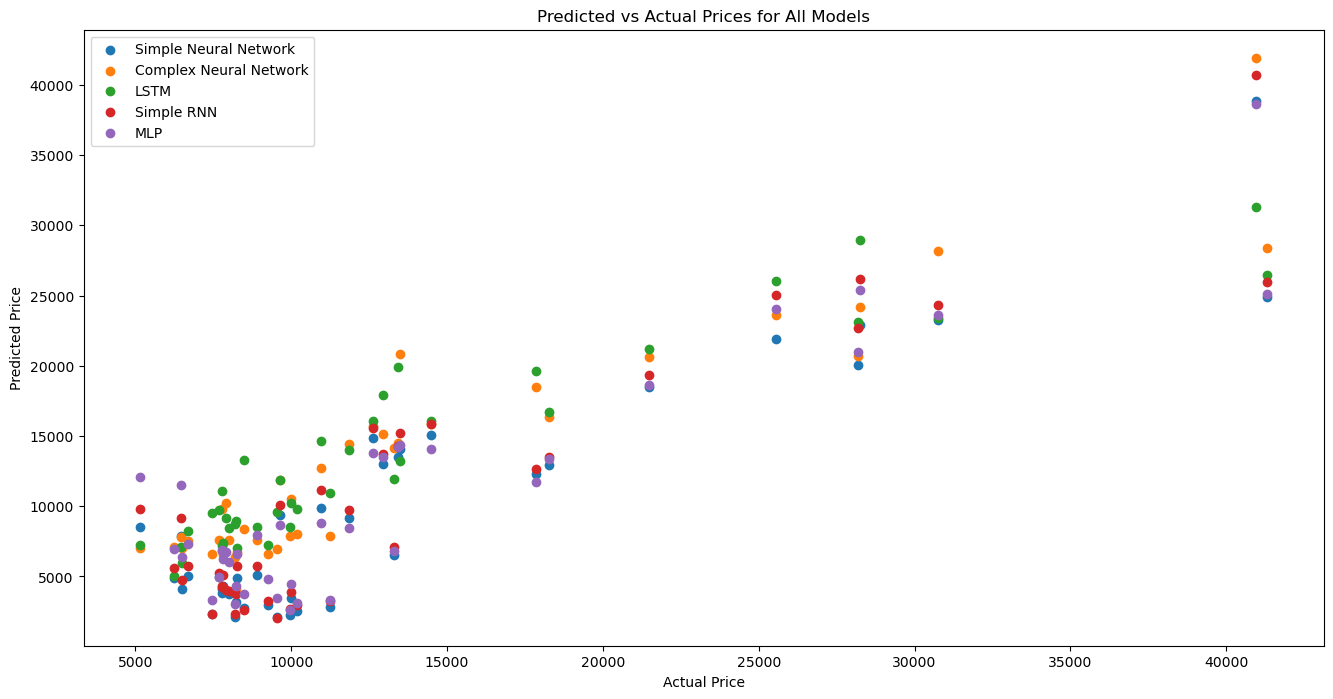

In [17]:
# Create scatter plots for predicted vs actual prices
models = [
    ("Simple Neural Network", model_simple, X_test_scaled, y_test),
    ("Complex Neural Network", model_complex, X_test_scaled, y_test),
    ("LSTM", model_lstm, X_test_lstm, y_test),
    ("Simple RNN", model_rnn, X_test_scaled, y_test),
    ("MLP", model_mlp, X_test_scaled, y_test)
]

plt.figure(figsize=(16, 8))

for model_name, model, X_eval, y_eval in models:
    y_pred = model.predict(X_eval).flatten()  # Flatten predictions
    plt.scatter(y_eval, y_pred, label=model_name)

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices for All Models')
plt.legend()
plt.savefig('D:/SET 3/Output/Scatter_Predicted_vs_Actual.png')
plt.show()

In [19]:
# Choose the model with the lowest MSE or highest R-squared
best_model_name = min(error_values, key=lambda x: x[1])[0]  # Choose by MSE
# or
best_model_name_R2 = max(error_values, key=lambda x: x[2])[0]  # Choose by R-squared

print(f"The best model by MSE is: {best_model_name}")
print('or',f"The best model by R-Squared is: {best_model_name_R2}")

The best model by MSE is: Complex Neural Network
or The best model by R-Squared is: Complex Neural Network


In [20]:
model_complex.save("model_complex_best_model.keras")
print("Best model saved succesfully!")

Best model saved succesfully!


In [22]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Load the saved model
model = load_model("model_complex_best_model.keras")

# Sample input data as a dictionary (replace with actual values for prediction)
input_data = {
    'symboling': [3],
    'CarName': ['alfa-romero giulia'],
    'fueltype': ['gas'],
    'aspiration': ['std'],
    'doornumber': ['two'],
    'carbody': ['convertible'],
    'drivewheel': ['rwd'],
    'enginelocation': ['front'],
    'wheelbase': [88.6],
    'carlength': [168.8],
    'carwidth': [64.1],
    'carheight': [48.8],
    'curbweight': [2548],
    'enginetype': ['dohc'],
    'cylindernumber': ['four'],
    'enginesize': [130],
    'fuelsystem': ['mpfi'],
    'boreratio': [3.47],
    'stroke': [2.68],
    'compressionratio': [9],
    'horsepower': [111],
    'peakrpm': [5000],
    'citympg': [21],
    'highwaympg': [27]
}

# Convert the input dictionary to a DataFrame
input_df = pd.DataFrame(input_data)

# Define label encoders and apply them to categorical columns
label_encoders = {
    'CarName': LabelEncoder().fit(['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls']),  # Add all unique CarNames from the dataset
    'fueltype': LabelEncoder().fit(['gas', 'diesel']),
    'aspiration': LabelEncoder().fit(['std', 'turbo']),
    'doornumber': LabelEncoder().fit(['two', 'four']),
    'carbody': LabelEncoder().fit(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']),
    'drivewheel': LabelEncoder().fit(['fwd', 'rwd', '4wd']),
    'enginelocation': LabelEncoder().fit(['front', 'rear']),
    'enginetype': LabelEncoder().fit(['dohc', 'ohcv', 'ohc', 'rotor', 'l', 'ohcf', 'dohcv']),
    'cylindernumber': LabelEncoder().fit(['four', 'six', 'five', 'eight', 'two', 'twelve', 'three']),
    'fuelsystem': LabelEncoder().fit(['mpfi', '2bbl', 'idi', '1bbl', 'spdi', '4bbl', 'mfi', 'spfi'])
}

# Apply label encoding to categorical columns
for col, encoder in label_encoders.items():
    if col in input_df.columns:
        input_df[col] = encoder.transform(input_df[col])

# Load the scaler used during training (assuming it was saved as 'scaler.pkl')
#scaler = joblib.load("scaler.pkl")
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio',
                     'horsepower', 'peakrpm', 'citympg', 'highwaympg']
input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

# Predict the price
predicted_price = model.predict(input_df)
print("Predicted car price:", predicted_price[0][0])
display(input_df)

C:\Users\Dell\anacondanew3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Predicted car price: 15790.658


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,1,1,0,1,0,2,0,0.0,0.0,...,2,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
